In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A. Daily attendance of bike tracks
every row contains the number of bicycles on every track of the city(montreal), for every day of the year. Can you infer anything from the attendence record?

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

Read
Check head
Check summary statistics
plot the daily attendance of two tracks, 'Berri1', 'PierDup'
Check index , explore weekday_name attributes
Get sum of all attendance as a function of the weekday
Display this in figure , what is the inference?

In [4]:

path = r"bikes.csv"
bikes = pd.read_csv(path)

In [5]:
bikes

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0
...,...,...,...,...,...,...,...,...,...,...
256,14/09/2013,00:00,2488,1494,1706,2911,979,1075,3277,2456
257,15/09/2013,00:00,2243,1749,1417,2933,1804,1459,3623,2527
258,16/09/2013,00:00,4206,2466,2799,5485,3272,855,4307,3012
259,17/09/2013,00:00,5506,3153,3563,6626,3882,1485,5332,3745


In [6]:

bikes.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0


In [7]:

bikes.columns





Index(['Date', 'Unnamed: 1', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc',
       'PierDup', 'Rachel1', 'Totem_Laurier'],
      dtype='object')

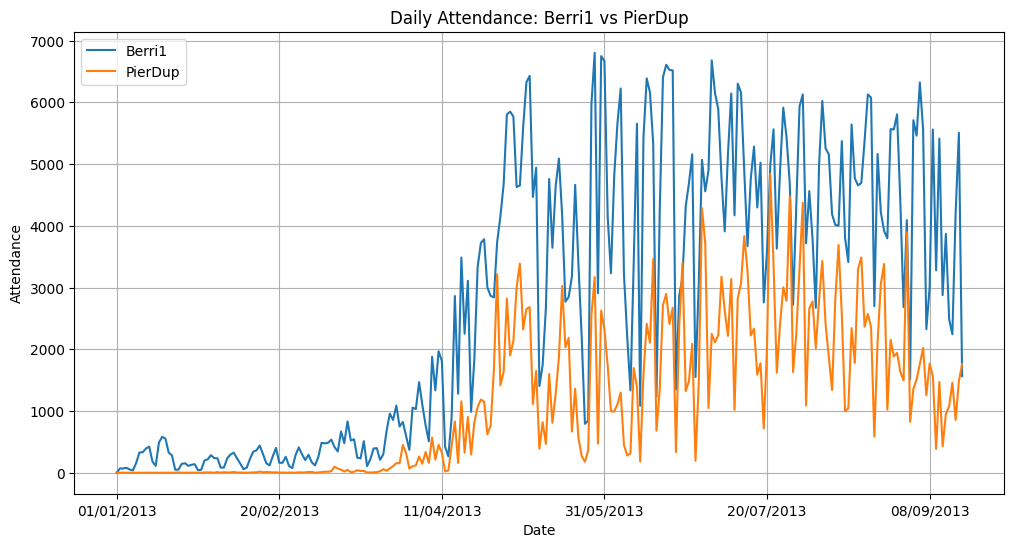

In [8]:
bikes.plot(x='Date', y=['Berri1', 'PierDup'], figsize=(12, 6), title="Daily Attendance: Berri1 vs PierDup")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.grid()
plt.show()

In [9]:


bikes['Date'] = pd.to_datetime(bikes['Date'], dayfirst=True)
bikes.set_index('Date', inplace=True)


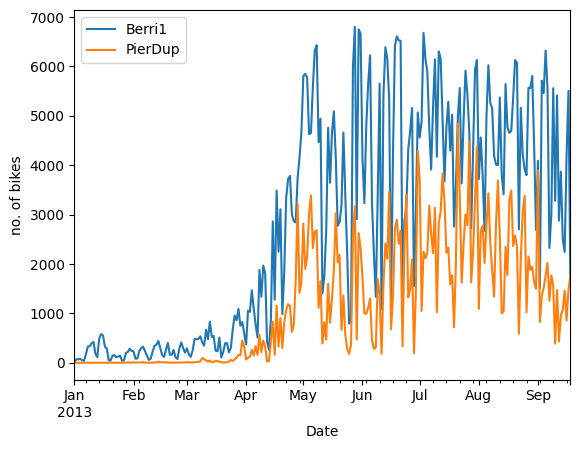

In [10]:
bikes[['Berri1', 'PierDup']].plot()
plt.ylabel('no. of bikes')
plt.show()

In [11]:
bikes['Weekday'] = bikes.index.day_name()

In [12]:
bikes.head()

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,Weekday
Date,,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0,Tuesday
2013-01-02,00:00,69,0,13,0,18,0,2,0,Wednesday
2013-01-03,00:00,69,2,21,6,22,1,0,0,Thursday
2013-01-04,00:00,80,0,22,4,16,0,125,0,Friday
2013-01-05,00:00,52,4,19,3,12,0,97,0,Saturday


In [13]:
weekday_sum = bikes.groupby('Weekday').sum()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sum1 = weekday_sum.reindex(order)


In [14]:

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sum1 = weekday_sum.reindex(order)


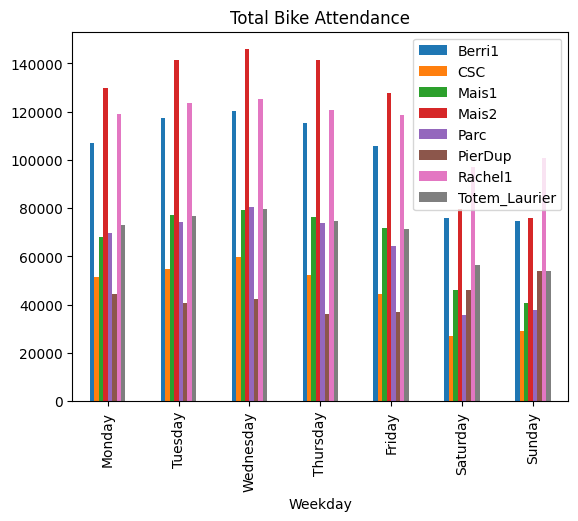

In [15]:
weekday_sum1.plot(kind='bar', title='Total Bike Attendance')
plt.show()


# B. Titanic

Database of whether somebody survived or not Can you infer who has survived ?

Load the data
Which gender survived more
Does it depend on pclass?
can we see % of survival of each gender and pclass What is your inference?

In [16]:
url = "titanic_train.csv"
titanic = pd.read_csv(url)


In [17]:
titanic


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
titanic.head

<bound method NDFrame.head of      survived  pclass                                               name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        sex   age  sibsp  parch            ticket     far

In [19]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [20]:
titanic.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [21]:
titanic.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [22]:
surv_rate = titanic.pivot_table(index='sex', columns='pclass', values='survived', aggfunc='mean')

In [23]:
surv_rate*100

pclass,1,2,3
sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


# C. Roger Federer database
Each row corresponds to a ATP match played by Roger Federer

Can you infer anything on Roger Federer performance?

player = 'Roger Federer' url = "https://raw.githubusercontent.com/ndas1971/Misc/master/federer.csv"

Read and check data
How many % of matched won by our player? ('winner')
Proportion of double faults wrt total points in each match This number is an indicator of the player's state of mind, his level of self-confidence, his willingness to take risks while serving, and other parameters. columns: 'player1 double faults' and 'player1 total points total' Display simple stats of above
Average Win per surface
Display the proportion of double faults as a function of the tournament date, 'start date' Trend: display average double faults in each year

In [33]:
path = r"C:\Users\Swagath\Desktop\federer.csv"
federer = pd.read_csv(path)



In [34]:

federer


,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2012,"Australian Open, Australia",16.01.2012,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,49.0,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0
1175,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,6.0,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0
1176,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,17.0,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0
1177,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",Q,...,29.0,4.0,9.0,16.0,47.0,78.0,34.0,95.0,81.0,173.0


In [35]:

federer.head()


,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
federer.index


RangeIndex(start=0, stop=1179, step=1)

In [37]:

federer.dtypes

year                                    int64
tournament                             object
start date                             object
type                                   object
surface                                object
                                       ...   
player2 total service points total    float64
player2 total return points won       float64
player2 total return points total     float64
player2 total points won              float64
player2 total points total            float64
Length: 70, dtype: object

In [38]:
wins = federer[federer['winner']==federer['player1 name']]
win_percent = (len(wins)/len(federer)) * 100
win_percent


82.44274809160305

In [39]:
federer['df_ratio'] = federer['player1 double faults'] / federer['player1 total points total']
federer.df_ratio

0       0.019417
1       0.000000
2       0.020270
3       0.046154
4            NaN
          ...   
1174    0.018116
1175    0.000000
1176    0.000000
1177    0.011561
1178         NaN
Name: df_ratio, Length: 1179, dtype: float64

In [40]:
wins = federer[federer['winner'] == federer['player1 name']]
total_surface = federer['surface'].value_counts()
win_surface = wins['surface'].value_counts()
win_surface_rate = (win_surface/total_surface)*100 
win_surface_rate


surface
Outdoor: Hard     84.232365
Outdoor: Clay     77.911647
Indoor: Hard      83.628319
Outdoor: Grass    87.142857
Indoor: Carpet    73.684211
Indoor: Clay      83.333333
Name: count, dtype: float64

In [41]:
federer['start date'] = pd.to_datetime(federer['start date'], errors='coerce')
federer['year'] = federer['start date'].dt.year
df_avg_yearly = federer.groupby('year')['df_ratio'].mean()
df_avg_yearly


year
1998.0    0.020738
1999.0    0.028285
2000.0    0.020918
2001.0    0.016780
2002.0    0.016084
2003.0    0.018211
2004.0    0.012856
2005.0    0.008778
2006.0    0.008495
2007.0    0.009116
2008.0    0.005306
2009.0    0.008313
2010.0    0.009711
2011.0    0.008275
2012.0    0.011024
Name: df_ratio, dtype: float64

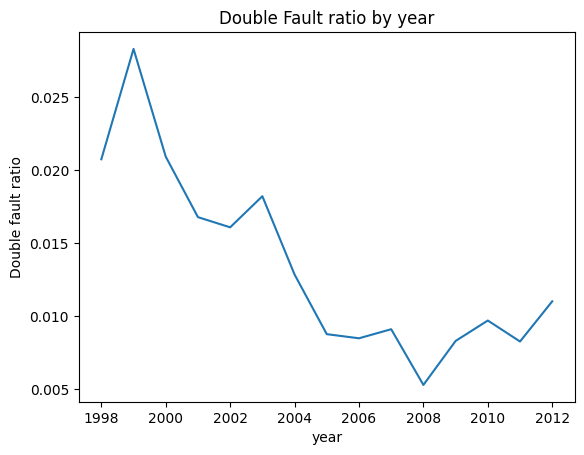

In [42]:
df_avg_yearly.plot(kind='line',title='Double Fault ratio by year')
plt.ylabel('Double fault ratio')
plt.show()

# D. Create two frequencies 5Hz and 50Hz sin signals Draw FFT components

In [43]:
f1=5
f2=50
fs=500 
T = 1 
t = np.linspace(0,T,fs*T, endpoint=False)

In [44]:
signal_5=np.sin(2*np.pi*f1*t)
signal_50=np.sin(2*np.pi*f2*t)

In [45]:
fft_vals1 = np.fft.fft(signal_5) #fft for 5
fft_freqs1 = np.fft.fftfreq(len(signal_5), 1/fs)

In [46]:
fft_vals2 = np.fft.fft(signal_50) #fft for 50
fft_freqs2 = np.fft.fftfreq(len(signal_50), 1/fs)

In [47]:
fft_df1 = pd.DataFrame({'Frequency': fft_freqs1, 'Amplitude': np.abs(fft_vals1)})
fft_df2 = pd.DataFrame({'Frequency': fft_freqs2, 'Amplitude': np.abs(fft_vals2)})

In [48]:

fft_df1 = fft_df1[fft_df1['Frequency'] > 0]
fft_df2 = fft_df2[fft_df2['Frequency'] > 0]

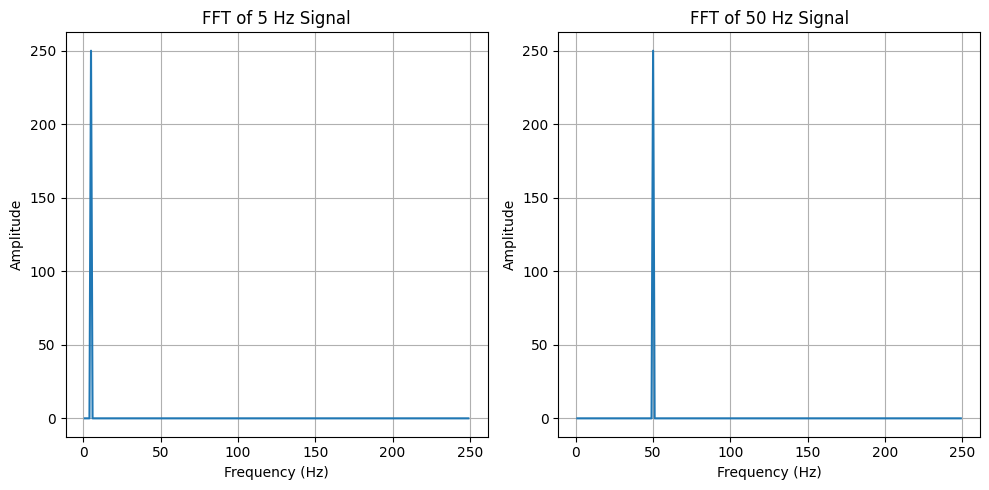

In [49]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fft_df1['Frequency'], fft_df1['Amplitude'])
plt.title("FFT of 5 Hz Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plotting FFT for the 50 Hz signal
plt.subplot(1, 2, 2)
plt.plot(fft_df2['Frequency'], fft_df2['Amplitude'])
plt.title("FFT of 50 Hz Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


     


# E. Plotting normal random numbers and show that addition of two Gaussian is Gaussian and addition of all is Gaussian

In [50]:
n = 10000 
mean = 0
sd=1

In [51]:
gaussian_1 = np.random.normal(mean, sd, n)
gaussian_2 = np.random.normal(mean, sd, n)
sum_two_gaussians = gaussian_1 + gaussian_2

In [52]:
n_gaussians = 5
sum_n_gaussians = np.zeros(n)
for _ in range(n_gaussians):
    sum_n_gaussians += np.random.normal(mean, sd, n)

In [53]:
df = pd.DataFrame({
    'gaussian_1': gaussian_1,
    'gaussian_2': gaussian_2,
    'sum_two_gaussians': sum_two_gaussians,
    'sum_n_gaussians': sum_n_gaussians
})


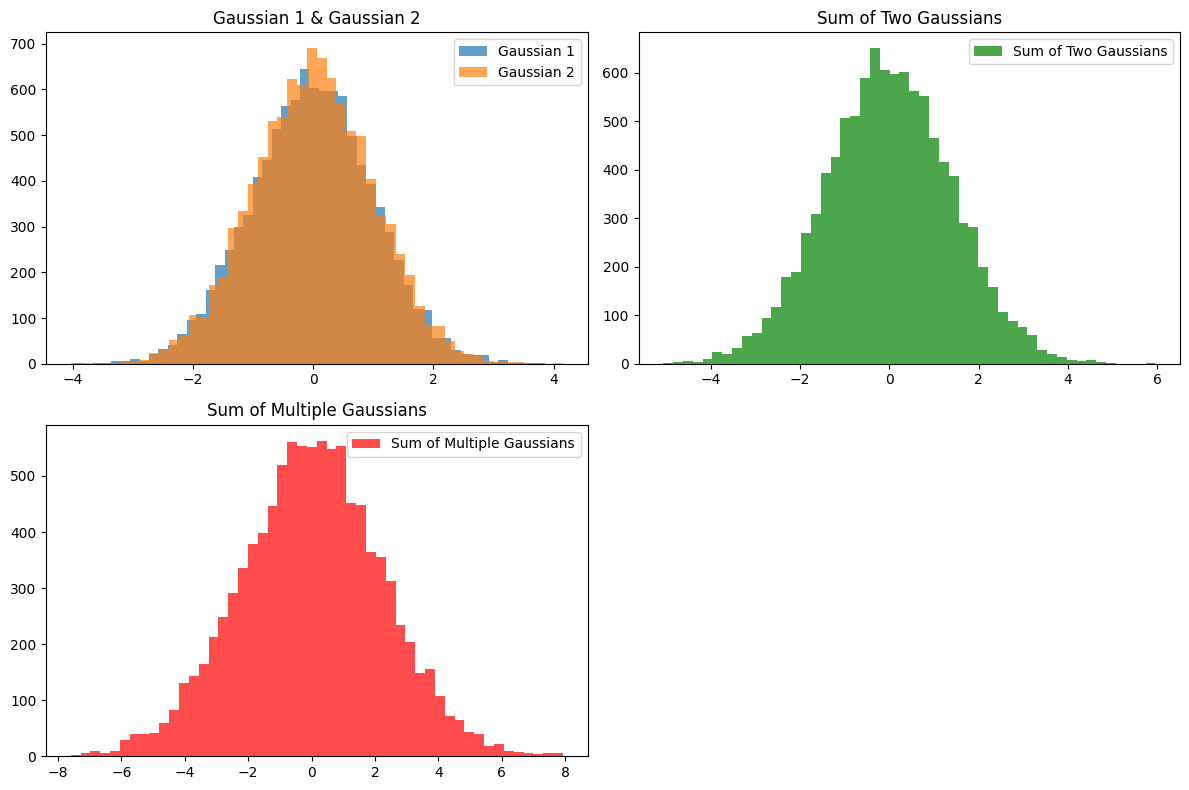

In [57]:
# Plotting histograms
plt.figure(figsize=(12, 8))

# Plot Gaussian 1 and Gaussian 2
plt.subplot(2, 2, 1)
plt.hist(gaussian_1, bins=50, alpha=0.7, label='Gaussian 1')
plt.hist(gaussian_2, bins=50, alpha=0.7, label='Gaussian 2')
plt.title('Gaussian 1 & Gaussian 2')
plt.legend()

# Plot sum of two Gaussians
plt.subplot(2, 2, 2)
plt.hist(sum_two_gaussians, bins=50, alpha=0.7, color='g', label='Sum of Two Gaussians')
plt.title('Sum of Two Gaussians')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(sum_n_gaussians, bins=50, alpha=0.7, color='r', label='Sum of Multiple Gaussians')
plt.title('Sum of Multiple Gaussians')
plt.legend()
plt.tight_layout()
plt.show()
